# LeNet-1

* First CNN architecture introduced by LeCun
* 2 Convolution_Layey + 1 Fully_Connected_Layer
* activation_function = tanh
* loss_function = cross_entropy
* optimizer = adam

## Mount Google Drive

In [1]:
# Colab 사용시
# from google.colab import drive
# drive.mount('/content/drive')

## Import Library

In [2]:
# Data
import numpy as np
import pandas as pd

# Preprcessing

# Model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Visualizatoin
from PIL import Image
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Env
import os

## GPU Setting

In [3]:
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

GPU found


## Hyper parameters

In [4]:
#Colab

#Server
DATA_DIR='../data/'
SAVE_DIR='../model/LeNet-1/'
LOAD_DIR='../model/LeNet-1/'

#Local
# DATA_DIR='C:/Users/is910/Desktop/MNIST/data/'
# SAVE_DIR='C:/Users/is910/Desktop/MNIST/model/LeNet-1/'
# LOAD_DIR='C:/Users/is910/Desktop/MNIST/model/LeNet-1/'

#Hyper parameter
BATCH_SIZE=64
SHUFFLE_BUFFER_SIZE=100
VERBOSE=1
PATIENCE=3
VALIDATION_SPLIT=0.2
EPOCHS=10

## Load data

In [5]:
raw_mnist = tf.keras.datasets.mnist

In [6]:
(X_train_raw, y_train), (X_test_raw, y_test) = raw_mnist.load_data()

In [7]:
np.info(X_train_raw)

class:  ndarray
shape:  (60000, 28, 28)
strides:  (784, 28, 1)
itemsize:  1
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x1e0893d6040
byteorder:  little
byteswap:  False
type: uint8


train 개수

In [8]:
print(X_train_raw.shape)

(60000, 28, 28)


test 개수

In [9]:
print(X_test_raw.shape)

(10000, 28, 28)


In [10]:
print(y_train.shape)

(60000,)


### Matplotlib Image

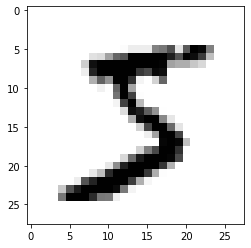

In [11]:
plt.imshow(X_train_raw[0], cmap='gray_r', interpolation='nearest')
plt.show()

### PIL Image

In [12]:
# pil_image = Image.fromarray(X_train_raw[0])
# pil_image.show()

## Preprocessing

### Min-Max Scaling

In [16]:
X_train_scaled, X_test_scaled = X_train_raw/255.0, X_test_raw/255.0

In [17]:
X_train_scaled.shape

(60000, 28, 28)

### Numpy to Tensor

In [21]:
X_train_tensor = tf.convert_to_tensor(X_train_scaled)
X_test_tensor = tf.convert_to_tensor(X_test_scaled)

In [23]:
X_train_tensor.shape

TensorShape([60000, 28, 28])

In [26]:
X_train=tf.reshape(X_train_tensor, [60000, 28, 28, -1])
X_test=tf.reshape(X_test_tensor, [10000, 28, 28, -1])
#X_train=X_train_tensor.reshape((60000, 28, 28, -1))

In [27]:
X_train.shape

TensorShape([60000, 28, 28, 1])

In [28]:
X_train[0].shape

TensorShape([28, 28, 1])

## Model definition
### LeNet-1

In [29]:
#model
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=4, kernel_size=5, padding='valid', activation='tanh', input_shape=X_train[0].shape
    ),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(
        filters=12, kernel_size=5, padding='valid', activation='tanh'
    ),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

## Model Compile

In [30]:
#early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=VERBOSE, patience=PATIENCE, restore_best_weights=True)
mcp = ModelCheckpoint(SAVE_DIR+'best-model.h5', monitor='val_accuracy', mode='max', verbose=VERBOSE, save_best_only=True)

#compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model Summary

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 4)         104       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 4)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 12)          1212      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 12)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 10)                1

## Train Model

In [32]:
history = model.fit(X_train, y_train, epochs=EPOCHS, callbacks=[es, mcp], batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT)

Epoch 1/10
728/750 [============================>.] - ETA: 0s - loss: 0.5376 - accuracy: 0.8529
Epoch 1: val_accuracy improved from -inf to 0.92567, saving model to ../model/LeNet-1\best-model.h5
750/750 [==============================] - 5s 2ms/step - loss: 0.5308 - accuracy: 0.8546 - val_loss: 0.2640 - val_accuracy: 0.9257
Epoch 2/10
738/750 [============================>.] - ETA: 0s - loss: 0.2383 - accuracy: 0.9312
Epoch 2: val_accuracy improved from 0.92567 to 0.94750, saving model to ../model/LeNet-1\best-model.h5
750/750 [==============================] - 1s 2ms/step - loss: 0.2375 - accuracy: 0.9314 - val_loss: 0.1840 - val_accuracy: 0.9475
Epoch 3/10
747/750 [============================>.] - ETA: 0s - loss: 0.1697 - accuracy: 0.9504
Epoch 3: val_accuracy improved from 0.94750 to 0.96125, saving model to ../model/LeNet-1\best-model.h5
750/750 [==============================] - 1s 2ms/step - loss: 0.1696 - accuracy: 0.9505 - val_loss: 0.1382 - val_accuracy: 0.9613
Epoch 4/10
74

## Test Model

In [33]:
loaded_model = load_model(SAVE_DIR+'best-model.h5')
loss, acc = loaded_model.evaluate(X_test, y_test)

print('Test loss:', loss)
print('Test accuracy:', acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0523 - accuracy: 0.9836
Test loss: 0.052296772599220276
Test accuracy: 0.9836000204086304


## Save Model

In [34]:
model_name = 'trained-model.h5'

# Save model and weights
model_path = os.path.join(SAVE_DIR, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ../model/LeNet-1/trained-model.h5 


## Evaluation

### Loss / Accuracy

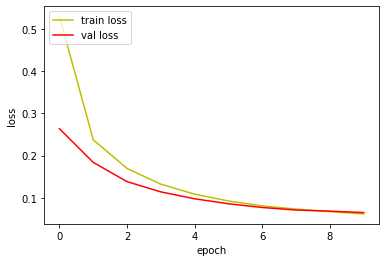

In [36]:
fig, loss_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')
plt.show()

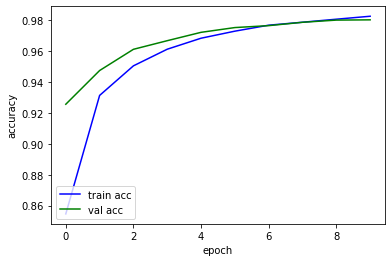

In [37]:
fig, acc_ax = plt.subplots()

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')

acc_ax.legend(loc='lower left')

plt.show()

In [35]:
# fig, loss_ax = plt.subplots()
# acc_ax = loss_ax.twinx()

# loss_ax.plot(history.history['loss'], 'y', label='train loss')
# loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

# acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
# acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

# loss_ax.set_xlabel('epoch')
# loss_ax.set_ylabel('loss')
# acc_ax.set_ylabel('accuracy')

# loss_ax.legend(loc='upper left')
# acc_ax.legend(loc='lower left')

# plt.show()


### Confusion matrix

In [38]:
y_pred = loaded_model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)
print(y_pred)

313/313 [==============================] - 0s 1ms/step
[7 2 1 ... 4 5 6]


[[ 976    0    0    0    0    0    2    1    1    0]
 [   0 1126    2    1    0    1    2    1    2    0]
 [   1    4 1013    2    2    0    1    5    4    0]
 [   1    0    3  984    0    8    0    8    3    3]
 [   1    0    0    0  969    0    3    1    1    7]
 [   1    0    1    8    0  878    2    1    1    0]
 [   4    1    0    0    1    2  949    0    1    0]
 [   0    2    8    2    0    0    0 1013    0    3]
 [   5    1    2    3    3    0    2    4  950    4]
 [   5    7    0    2    8    0    0    8    1  978]]


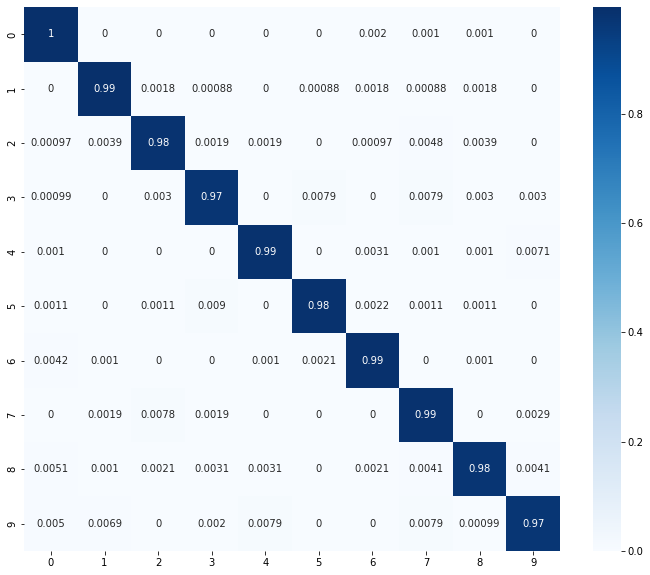

In [39]:
# constant for classes
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

# Build confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
df_cm = pd.DataFrame(cf_matrix/cf_matrix.sum(axis=1).reshape(10, 1), index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,10))
sn.heatmap(df_cm, annot=True, cmap='Blues')
plt.savefig(SAVE_DIR + 'output.png')

### precision, recall, f1 score

In [40]:
acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred, average='macro')
re_score = recall_score(y_test, y_pred, average='macro')
f1_score_s = f1_score(y_test, y_pred, average='macro')
print("accuracy_score: ", acc_score)
print("precision_score: ", prec_score)
print("recall_score: ", re_score)
print("f1_score: ", f1_score_s)

accuracy_score:  0.9836
precision_score:  0.9836689931850946
recall_score:  0.9835551911087022
f1_score:  0.9835922773198844


## Load Model

In [41]:
model_name='trained-model.h5'
model_path=os.path.join(LOAD_DIR, model_name)
model=load_model(model_path)

## Predict

In [42]:
print(X_train.shape, X_train[0].shape, sep='\n')

(60000, 28, 28, 1)
(28, 28, 1)


In [43]:
def predict_mnist(tensor, model):
    sample=tf.reshape(tensor, [-1, 28, 28])
    result_prob=model.predict(sample, verbose=0)
    result=np.argmax(result_prob)
    print(result)

5 클래스에 대한 예측

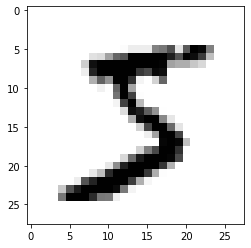

In [44]:
plt.imshow(X_train[0], cmap='gray_r', interpolation='nearest')
plt.show()

In [45]:
predict_mnist(X_train[0], model)

5


 0 클래스에 대한 예측

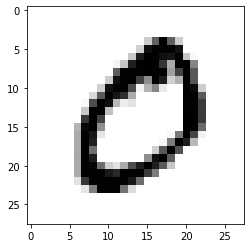

In [46]:
plt.imshow(X_train[1], cmap='gray_r', interpolation='nearest')
plt.show()

In [47]:
predict_mnist(X_train[1], model)

0
